In [2]:
#load related packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model

In [3]:
%matplotlib inline

In [5]:
boston=load_boston()
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
dataset['target']=boston.target

In [8]:
observations=len(dataset)
#变量名，去除倒数第一个
variables=dataset.columns[:-1]

In [9]:
variables

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [11]:
X=dataset.ix[:,:-1]
y=dataset['target'].values

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
Xc=sm.add_constant(X)
linear_regression=sm.OLS(y,Xc)
fitted_model=linear_regression.fit()

In [15]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          6.95e-135
Time:                        21:35:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#自变量的相关性矩阵
correlation_matrix=X.corr()
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

In [26]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off',top='off',left = 'off', right = 'off')
    plt.colorbar()
    #plt.figure(figsize=(60,30))
    plt.show()

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\Program Files (x86)\Microsof

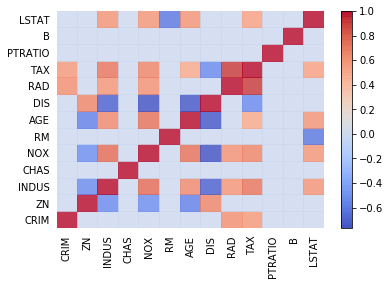

In [27]:
visualize_correlation_matrix(X,hurdle=0.5)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [29]:
linear_regression = linear_model.LinearRegression(normalize=False,fit_intercept=True)
create_cubic = PolynomialFeatures(degree=3, interaction_only=False,include_bias=False)
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
linear_predictor = make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic,linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

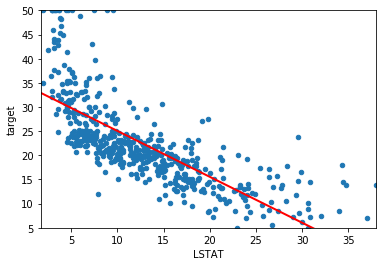

In [33]:
predictor = 'LSTAT'
x = dataset['LSTAT'].values.reshape((observations,1))
xt = np.arange(0,50,0.1).reshape((500,1))
x_range = [dataset[predictor].min(),dataset[predictor].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]
scatter = dataset.plot(kind='scatter', x=predictor, y='target',xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, linear_predictor.fit(x,y).predict(xt),'-',color='red', linewidth=2)

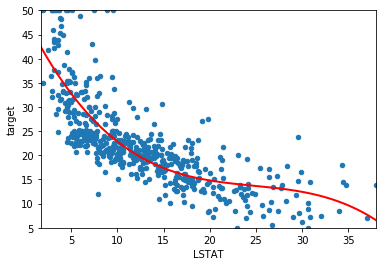

In [34]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target',xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, cubic_predictor.fit(x,y).predict(xt), '-',color='red', linewidth=2)

In [52]:
#核密度估计
from sklearn.cross_validation import train_test_split
from sklearn.neighbors.kde import KernelDensity

In [53]:
from scipy.integrate import quad
from scipy import stats
rv=stats.beta(2,2)
n=100
d=rv.rvs(n)[:,None]

In [54]:
d

array([[0.81997332],
       [0.81915698],
       [0.46492838],
       [0.39545798],
       [0.28847585],
       [0.74956996],
       [0.94377919],
       [0.47536046],
       [0.52667534],
       [0.83333011],
       [0.44627932],
       [0.50271909],
       [0.43268457],
       [0.49952552],
       [0.43961106],
       [0.68974396],
       [0.51521576],
       [0.83583137],
       [0.51503132],
       [0.64784136],
       [0.2645006 ],
       [0.39097985],
       [0.22858558],
       [0.7716259 ],
       [0.84627526],
       [0.46683749],
       [0.389727  ],
       [0.78203735],
       [0.53986655],
       [0.11814313],
       [0.19283191],
       [0.13252822],
       [0.5779915 ],
       [0.26860384],
       [0.73699967],
       [0.39490853],
       [0.66179899],
       [0.16001573],
       [0.53855918],
       [0.96802605],
       [0.85086872],
       [0.84211869],
       [0.7096119 ],
       [0.37177494],
       [0.11183701],
       [0.9570367 ],
       [0.39241047],
       [0.486

In [55]:
train,test,_,_=train_test_split(d,d,test_size=0.5)

In [56]:
kdes=[KernelDensity(bandwidth=i).fit(train) for i in [.05,0.1,0.2,0.3]]

In [62]:
a=kdes[1].sample(20)

In [63]:
kdes[1].score_samples(a)

array([ 0.49988849,  0.10802222, -0.43591777,  0.49069298,  0.15577391,
       -0.43162564,  0.24636186, -0.33300534, -0.48941999, -1.5984093 ,
        0.14766556,  0.48678183,  0.42508432, -1.95009288,  0.03586467,
        0.52966539,  0.11888755, -0.65116332,  0.14587327,  0.06152902])

In [73]:
pro=[np.exp(kdes[1].score_samples(i)) for i in [train.tolist()]]

In [74]:
pro

[array([1.1695283 , 1.69452452, 1.15530543, 0.62022668, 1.55693008,
        1.15532694, 1.0991225 , 1.61807735, 1.59532854, 1.64070951,
        0.81457201, 0.85937824, 0.79876353, 1.15207804, 1.15801584,
        1.04148682, 1.6133417 , 0.60333446, 1.43089112, 1.02358059,
        1.69277561, 1.58233365, 1.22147004, 1.53450806, 0.97686233,
        1.68973486, 1.09997871, 1.04313527, 1.02652347, 1.16706807,
        1.65155882, 1.59434416, 1.69893328, 0.64034707, 1.59524317,
        1.40023056, 1.62526487, 1.39666171, 0.61277519, 0.99834098,
        1.20527702, 1.05296863, 1.16841889, 1.58632553, 0.41069719,
        1.69853797, 0.60649644, 1.58098957, 1.55425028, 0.59631412])]

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [76]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5 #300以后的数字增加5
    return x

x = make_data(1000)

In [77]:
len(x)

1000

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


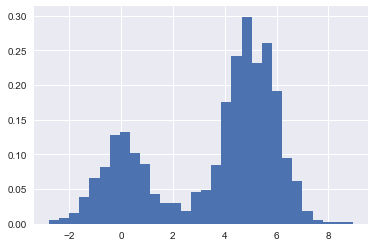

In [78]:
hist = plt.hist(x, bins=30, normed=True)

(-0.02, 0.22)

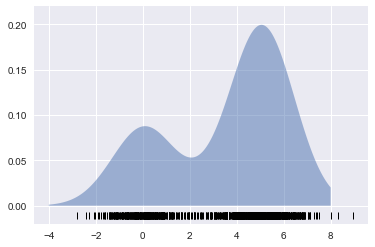

In [84]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
x_d = np.linspace(-4, 8, 1000)
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [85]:
#网格搜索比较耗时
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(x)))
grid.fit(x[:, None]);

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [86]:
grid.best_params_

{'bandwidth': 0.35111917342151316}

In [87]:
#时间序列分解
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

In [88]:
wisc_emp = pd.read_csv('wisconsin-employment-time-series.csv')
wisc_emp.index = wisc_emp['Month']

In [89]:
wisc_emp.head()

,Month,Employment
0,1961-01,239.6
1,1961-02,236.4
2,1961-03,236.8
3,1961-04,241.5
4,1961-05,243.7


In [90]:
wisc_emp.index = wisc_emp['Month']

In [92]:
#检查有缺失值的行
missing = (pd.isnull(wisc_emp['Employment'])) | (pd.isnull(wisc_emp['Month']))
print('Number of missing values found:', missing.sum())
#移除有缺失值的行
wisc_emp = wisc_emp.loc[~missing, :]

Number of missing values found: 0


In [93]:
#对原时间序列进行ADF检验
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag='AIC')

In [94]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.9810000189539195


In [95]:
#进行指数光滑分解
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12, model='additive')

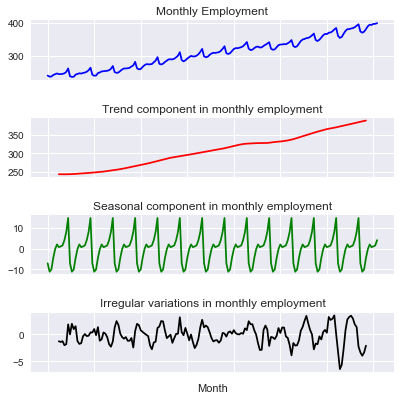

In [96]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)
#对原始数据进行绘图
wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')
#提取趋势
pd.Series(data=decompose_model.trend, index=wisc_emp.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in monthly employment')
#提取季节性成分
pd.Series(data=decompose_model.seasonal, index=wisc_emp.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in monthly employment')
#提取无法解释成分
pd.Series(data=decompose_model.resid, index=wisc_emp.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)

plt.savefig('12.24.png', format='png', dpi=300)

In [97]:
#对残差进行ADF检验
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],autolag='AIC')

In [98]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.006560931634641313


In [99]:
#拟合一个乘法模型
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12, model='multiplicative')

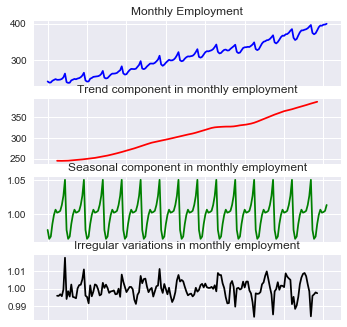

In [100]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

axarr[1].plot(decompose_model.trend, color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly employment')

axarr[2].plot(decompose_model.seasonal, color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly employment')

axarr[3].plot(decompose_model.resid, color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly employment')

plt.savefig('12_24.png', format='png', dpi=300)

In [101]:
#Run ADF test on the 残差
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], autolag='AIC')